### This is a manual loader for almost any cell

**Experimental-id:** Post mortem analysis
**Short-name:** `Sample batch name here`  
**Project:** All 
**By:** `John Ostrander`   
**Date:** `2023-01-14`  

## 1. Setting up everything.   This is Template file and should be used for future pages.

###  List of samples Remarked samples are bad/bad data

CELL DATA THAT IS BAD (in red) FOR SOME REASON should be redundantly marked in spreadsheet, loader, and GITT exporter.
| updated 3.12.2023| 2 | cells in this page | 
|---  | --- | --- | 
| <p style="color:#FF0000">bad sample </p>  |  Sample_1 | Sample2  |   
|  Sample_3 |  and so on.... |   |

This template contains code which extracts capacity data from the capacity vs. voltage plots.



### Import everything you will use in this first cell (quicker)
Note! This template was made for `cellpy` version 0.4.1.a3

In [1]:
import sys
import cellpy
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

from cellpy import prms
from cellpy import prmreader
from cellpy.utils import batch, plotutils
from IPython.display import display, Markdown

%matplotlib inline
print(f"cellpy version: {cellpy.__version__}")

cellpy version: 0.4.3a2


In [2]:
#  cell_labels     #  This is after you load the cells, otherwise you get an error

## Listing all files

In [3]:
path0=r'c:\scripting\cellpy_data\Raw'           #  This indicates the path for data files.  this is my path, replace it with yours
path_obj = Path(path0)

file_path01=r"C:\path01\"                       #  When exporting graphs, these two directors will contain the exported files
file_path02= r"C:\path02\"


### Creating pages and initialise the cellpy batch object
If you need to create Journal Pages, please provide appropriate names for the project and the experiment to allow `cellpy` to build the pages.

In [6]:
# Parameters for the batch
project = "Name_of_project"                     #  This is for purposes of labels in the dataframe
name = "experiment_name(s)"

# this is the name of the batch file as well
batch_col = "b03"                               # This is residue from the auto-loader.  It doesn't do anything, but the loader will not work properly without it.



In [7]:
b = batch.init(name, project, batch_col=batch_col, db_reader=None)  # Note! db_reader= None is necessary to use the manual loader

### Set optional parameters
You should set overall parameters before creating the journal and lodaing the data. The most common ones are given below (uncomment what you need).

In [8]:
## Setting some prms if default values are not OK for you
# b.experiment.nom_cap = 372.0
b.experiment.export_raw = False
b.experiment.export_cycles = False
b.experiment.export_ica = False
# b.experiment.force_cellpy = True  # force to select the cellpy-files
# b.experiment.force_raw = True  # force to select the raw files
# b.experiment.all_in_memory = True  # store all data in memory, defaults to False
# b.save_cellpy = False  # prevent saving the generated cellpy-files 
# b.last_cycle = 1000  # only load max 1000 cycles

## Manually making the journal pages
This was used because the typical cellpy install did not work.  it has more flexibility however.

In [9]:
b.create_journal()

In [10]:
b.pages = b.experiment.journal.create_empty_pages()

In [11]:
b.pages         #  This should generate an empty table with column headers

,mass,total_mass,loading,nom_cap,experiment,fixed,label,cell_type,instrument,raw_file_names,cellpy_file_name,group,sub_group,comment,argument
filename,,,,,,,,,,,,,,,


In [12]:
# copy pages and transpose (need to transpose to add a list)
temporary_pages = b.pages.copy().T



SAMPLEs

In [13]:
battery01="file_name01"         #  This is the base filename as in cellpy, wihtout numeric or file extensions
full_paths_01 = [               #  Each of these lists concantenates each series of data files for each sample
    r"path\file_nam01_01.res",
    r"path\file_nam01_02.res",
    r"path\file_nam01_03.res"

]



In [14]:
battery02="file_nam02"      
full_paths_02 = [
     r"path\file_nam02_01.res",
     r"path\file_nam0202.res",
     r"path\file_nam02_03.res"

]

   


In [15]:
battery03="file_nam03"
full_paths_03 = [
     r"path\file_nam03",
     r"path\file_nam03"      
    ]



### Set values for your electrodes


In [8]:
area = 1.767
nmc_cathode     =150                    #(mAh/g)  This is for LG series commercial batteries
graphite_anode  =350                    #  You can add additional materials and values, but need 
                                        # to remember to include those in the following cells too.  

In [17]:
#  Cell 1  #  file_name01, these are notes for reference.  Helps keep it all organized.
total_mass01    = 30.55                 #(mg of materials)
Capacity01      = nmc_cathode           # this identifies the material used and simplifies the rest of the code

#  Cell 2   # file_name01
total_mass02    = 27.98                 #(mg of materials)
Capacity02      = nmc_cathode           # (mAh/g)

#  Cell 3  # file_name01
total_mass03    = 30.050                # (mg of materials)
Capacity03      = nmc_cathode           # (mAh/g)

### Script that does not need to be changed

In [18]:
# Automatically generated values (1 of 2)  This code authomatically distiguishes anode and cathode based on previous entry
#  Cell 1
if Capacity01 == graphite_anode:
    electrode01 = "anode"
elif Capacity01 == nmc_cathode:
    electrode01 = "cathode"
else:
    # Handle the case when Capacity01 is neither graphite_anode nor nmc_cathode
    # You can raise an error or set a default value, depending on your needs
    raise ValueError("Invalid value for Capacity01: " + str(Capacity01))

# Now, you can manually set Capacity01 and have electrode01 automatically generated.
# Check the value of electrode and set Capacity02 accordingly
# cell 2
if Capacity02 == graphite_anode:
    electrode02 = "anode"
elif Capacity02 == nmc_cathode:
    electrode02 = "cathode"
else:
    raise ValueError("Invalid value for Capacity02: " + str(Capacity02))

#  Cell 3
if Capacity03 == graphite_anode:
    electrode03 = "anode"
elif Capacity03 == nmc_cathode:
    electrode03 = "cathode"
else:
    raise ValueError("Invalid value for Capacity03: " + str(Capacity03))

#   More code can be added.   This template was comparing three cells.

In [19]:
# For my samples these were 10% inactive. This should be changed for samples that are a different percentage
# It should be pointed out there is only one active material in these electrodes, may not be suitable for hybrid
# materials.   However, the percent active material is easily changed.

#  Cell 1
mass01          = 0.9*total_mass01        #(mg of active material only)                                             
loading01       = mass01/(area)          # (mg/cm^2) == areal densisity

#  Cell 2
mass02          = 0.9*total_mass02           
loading02       = mass02/(area)          

#  Cell 3
mass03          = 0.9*total_mass03      
loading03       = mass03/(area)        

Continuing.....

In [20]:
# manually create a list for each cell.  Thid code does not need to be changed.

cell01 = [mass01, total_mass01,loading01, Capacity01, None, False, "battery01", "anode", "arbin_res", full_paths_01, battery01+".h5", 1, 1, None, None]

cell02 = [mass02, total_mass02, loading02, Capacity02, None, False, "battery02", "anode", "arbin_res", full_paths_02, battery02+".h5", 2, 1, None, None]

cell03 = [mass03, total_mass03, loading03, Capacity03, None, False, "battery03", "anode", "arbin_res", full_paths_03, battery03+".h5", 3, 1, None, None]





In [22]:
# add each list to the temporary dataframe (temporary pages)
temporary_pages[(battery01)] = cell01
temporary_pages[(battery02)] = cell02
temporary_pages[(battery03)] = cell03



In [23]:
# transpose to proper format and assign to your journal
b.pages = temporary_pages.T


In [24]:
b.pages         # this will generate a list as before, but will be filled in with sample data for verification.

,mass,total_mass,loading,nom_cap,experiment,fixed,label,cell_type,instrument,raw_file_names,cellpy_file_name,group,sub_group,comment,argument
filename,,,,,,,,,,,,,,,
20220705_JP3_post_mortem_502K_15_02,27.495,30.55,15.560272,150,None,False,battery01,anode,arbin_res,[c:\scripting\cellpy_data\Raw\20220705_JP3_pos...,20220705_JP3_post_mortem_502K_15_02.h5,1,1,None,None
20220705_JP3_post_mortem_626K_3_02_cc,25.182,27.98,14.251273,150,None,False,battery02,anode,arbin_res,[c:\scripting\cellpy_data\Raw\20220705_JP3_pos...,20220705_JP3_post_mortem_626K_3_02_cc.h5,2,1,None,None
20230804_T4_592K26t2_01_cc,27.045,30.05,15.305603,150,None,False,battery03,anode,arbin_res,[c:\scripting\cellpy_data\Raw\20230804_T4_592K...,20230804_T4_592K26t2_01_cc.h5,3,1,None,None


### Create the journal and appropriate folder structure


In [25]:
b.paginate()                                # Create the apropriate folders

In [26]:
b.save_journal()                            # save the journal file

### Make sure one more time that working directory is correct 

In [27]:
# b.pages                                     # Show the journal pages

In [28]:
b.duplicate_journal()                         

## 2. Loading data

In [29]:
b.update()                                    # this compliles the data into hdf5 files for plotting

  0%|          | 0/3 [00:00<?, ?it/s]

#### Modify the pages

In [30]:
npages = b.pages.copy()                     # make a copy of pages (in case you do something stupid)

set the updated dataframe as your new pages

In [31]:
b.save_journal()                            # if you have made any changes to your journal pages, you should save it again.

b.pages = npages

#### Recalculate and link
If you have changed parameters that `cellpy` uses internally in its calculations, such as nominal capacity or mass, you will have to do a recalculation. 
If you have removed cells, you will need to do a new linking.

## 3. Initial investigation of the batch experiment

### 3.1 Summaries

In [32]:
b.combine_summaries()                   # Collect summary-data (e.g. charge capacity vs cycle number) from each cell and export to .csv-file(s).

In [9]:
# b.plot_summaries()                      # Plot the charge capacity and the C.E. (and resistance) vs. cycle number (standard plot)
                                          # this is not presently working in the manual loader.  It has worked before but intermittently.

### Cell information
for JP3 anodes 4.5 and Cathodes ~2.5mAh/cm2


In [34]:
b.link()                                                    # or b.update() if you would like to get new data from the tester.

cell_labels = b.experiment.cell_names                       #  print(" cell labels: ")

# cell_labels                                               #  This displays cell labels if you want



In [35]:
cell_data01 = b.experiment.data[battery01]
cell_data02 = b.experiment.data[battery02]
cell_data03 = b.experiment.data[battery03]

mass1 = mass01/1000                                 #  converts mass = mg to mass = grams
mass2 = mass02/1000                                 
mass3 = mass03/1000
                                                    
area = 1.767                                        # areas in cm^2, 1.767 for 15mm punched electrode

# what cycle do you want to see?
cycle_numbers = [3]                               #  This will carry down to all the cells below.  
                                                  #  for n in x:

In [36]:
#   These were left in the event more cells are added to the manual loader.   Note the scripts are basically the same as before.
# cell_data04 = b.experiment.data[battery04]
# cell_data05 = b.experiment.data[battery05]
# cell_data06 = b.experiment.data[battery06]
# cell_data07 = b.experiment.data[battery07]
# cell_data08 = b.experiment.data[battery08]
# cell_data09 = b.experiment.data[battery09]
# # cell_data10 = b.experiment.data[battery10]

# mass4 = mass04/1000                                 #  mass = grams
# mass5 = mass05/1000                                 
# mass6 = mass06/1000
# mass7 = mass07/1000                                
# mass8 = mass08/1000                                 
# mass9 = mass09/1000
# # mass10 = mass10/1000                                

## compile and export area/mass graphs

In [38]:
#  Please refer to Cellpy documentations to change chart type. The preferred here is "forth and forth"

# This is for areal capacity calculations

capacity_voltage1 = cell_data01.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
capacity_voltage2 = cell_data02.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
capacity_voltage3 = cell_data03.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")

#  These were left for adding more cells if desired.
# capacity_voltage4 = cell_data04.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_voltage5 = cell_data05.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_voltage6 = cell_data06.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_voltage7 = cell_data07.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_voltage8 = cell_data08.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_voltage9 = cell_data09.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")


In [39]:
capacity_voltage1.capacity = capacity_voltage1.capacity * mass1/(area)
capacity_voltage2.capacity = capacity_voltage2.capacity * mass2/(area)
capacity_voltage3.capacity = capacity_voltage3.capacity * mass3/(area)

#  These were left for adding more cells if desired.
# capacity_voltage4.capacity = capacity_voltage4.capacity * mass4/(area)
# capacity_voltage5.capacity = capacity_voltage5.capacity * mass5/(area)
# capacity_voltage6.capacity = capacity_voltage6.capacity * mass6/(area)
# capacity_voltage7.capacity = capacity_voltage7.capacity * mass7/(area)
# capacity_voltage8.capacity = capacity_voltage8.capacity * mass8/(area)
# capacity_voltage9.capacity = capacity_voltage9.capacity * mass9/(area)



### now do mass

In [40]:
capacity_mass1 = cell_data01.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
capacity_mass1.capacity = capacity_mass1.capacity / mass1 

capacity_mass2 = cell_data02.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
capacity_mass2.capacity = capacity_mass2.capacity /mass2

capacity_mass3 = cell_data03.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
capacity_mass3.capacity = capacity_mass3.capacity / mass3


In [41]:
#  These were left for adding more cells if desired.

# capacity_mass4 = cell_data04.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_mass4.capacity = capacity_mass4.capacity 

# capacity_mass5 = cell_data05.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_mass5.capacity = capacity_mass5.capacity 

# capacity_mass6 = cell_data06.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_mass6.capacity = capacity_mass6.capacity 

# capacity_mass7 = cell_data07.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_mass7.capacity = capacity_mass7.capacity 

# capacity_mass8 = cell_data08.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_mass8.capacity = capacity_mass8.capacity 

# capacity_mass9 = cell_data09.get_cap(cycle_numbers, label_cycle_number=True, method="forth-and-forth")
# capacity_mass9.capacity = capacity_mass9.capacity 




## Plot

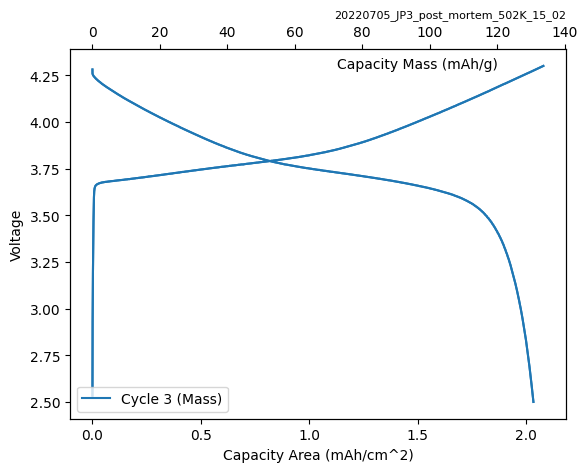

In [42]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

g_area = capacity_voltage1.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}')
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
# ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass1.groupby("cycle")
for cycle_number, frame in g_mass:
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)')
ax2.set_xlabel('Capacity Mass (mAh/g)')

ax2.legend(loc='lower left')

plt.title(battery01, fontsize=8, loc='right')   # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.7, 0.95)           # Adjust the values to move the label below the x2 axis

ax2.xaxis.label.set_fontsize(10)                # Adjust the font size as needed

# Show the plot
plt.show()


In [43]:
# Construct the full path to save the file in the specified folder
file_name_1 = os.path.join(file_path01, os.path.basename(f"{battery01}_mass&area_Cycle{cycle_number}") + ".jpg")
file_name_1a = os.path.join(file_path02, os.path.basename(f"{battery01}_mass&area_Cycle{cycle_number}") + ".jpg")

# Save the figure without including the folder name
fig.savefig(file_name_1, dpi=300)
fig.savefig(file_name_1a, dpi=300)

Extract final data points (n).  Here, =3 and was set above as cycle_number

In [ ]:
# For capacity charge area plot
g_area = capacity_voltage1.groupby("cycle")
for cycle_number, frame in g_area:
    last_three_area = frame.tail(3)                                 #  frame.tail(3) where 3= number of data points
    display(Markdown(f'### Cycle {cycle_number} - Area Charge Cap'))
    display(last_three_area[['capacity', 'voltage']])

# For discharge areal capacity plot
g_discharge = capacity_voltage1[capacity_voltage1['voltage'] <= 2.52].groupby("cycle")  # Matplot lib cannot automatically find
for cycle_number, frame in g_discharge:                                                 # the last discharge points, you have to 
    last_three_discharge = frame.tail(3)                                                # narrow it down.  2.52 worked here.
    display(Markdown(f'### Cycle {cycle_number} - Area Discharge Cap'))
    display(last_three_discharge[['capacity', 'voltage']])
    
# For capacity mass plot
# Assuming you have a similar DataFrame for capacity_mass1
g_mass = capacity_mass1.groupby("cycle")
for cycle_number, frame in g_mass:
    last_three_mass = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - mass charge Cap'))
    display(last_three_mass[['capacity', 'voltage']])
    
    # For discharge mass capacity plot
g_discharge_mass = capacity_mass1[capacity_mass1['voltage'] <= 2.52].groupby("cycle")
for cycle_number, frame in g_discharge_mass:
    last_three_discharge_mass = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - Mass Discharge Cap'))
    display(last_three_discharge_mass[['capacity', 'voltage']])


Cell 2

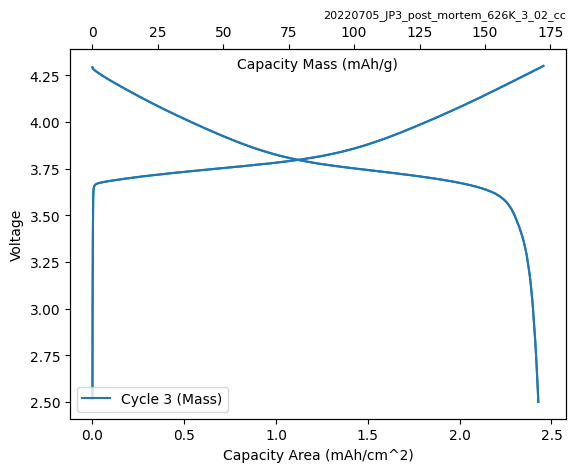

In [45]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

g_area = capacity_voltage2.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}')
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
# ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass2.groupby("cycle")
for cycle_number, frame in g_mass:
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)')
ax2.set_xlabel('Capacity Mass (mAh/g)')

ax2.legend(loc='lower left')

plt.title(battery02, fontsize=8, loc='right')  # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis


# Show the plot
plt.show()

In [ ]:
# Construct the full path to save the file in the specified folder
file_name_2 = os.path.join(file_path01, os.path.basename(f"{battery02}_mass&area_Cycle{cycle_number}") + ".jpg")
file_name_2a = os.path.join(file_path02, os.path.basename(f"{battery02}_mass&area_Cycle{cycle_number}") + ".jpg")

# Save the figure without including the folder name
fig.savefig(file_name_2, dpi=300)
fig.savefig(file_name_2a, dpi=300)

Extract last n data points for cell 2

In [ ]:
# For capacity charge area plot
g_area = capacity_voltage2.groupby("cycle")
for cycle_number, frame in g_area:
    last_three_area = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - Area Charge Cap'))
    display(last_three_area[['capacity', 'voltage']])

# For discharge areal capacity plot
g_discharge = capacity_voltage2[capacity_voltage2['voltage'] <= 2.52].groupby("cycle")
for cycle_number, frame in g_discharge:
    last_three_discharge = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - Area Discharge Cap'))
    display(last_three_discharge[['capacity', 'voltage']])
    
# For capacity mass plot
# Assuming you have a similar DataFrame for capacity_mass2
g_mass = capacity_mass2.groupby("cycle")
for cycle_number, frame in g_mass:
    last_three_mass = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - mass charge Cap'))
    display(last_three_mass[['capacity', 'voltage']])
    
    # For discharge mass capacity plot
g_discharge_mass = capacity_mass2[capacity_mass2['voltage'] <= 2.52].groupby("cycle")
for cycle_number, frame in g_discharge_mass:
    last_three_discharge_mass = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - Mass Discharge Cap'))
    display(last_three_discharge_mass[['capacity', 'voltage']])


Cell 3

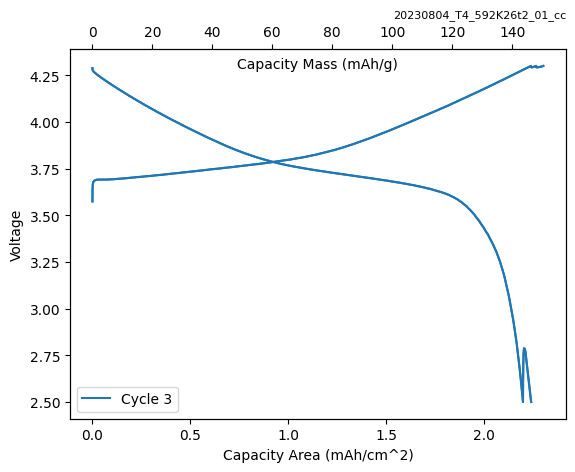

In [47]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

g_area = capacity_voltage3.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}')
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass3.groupby("cycle")
for cycle_number, frame in g_mass:
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)')
ax2.set_xlabel('Capacity Mass (mAh/g)')

# Combine legends from both x-axes
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title(battery03, fontsize=8, loc='right')  # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis

#  ax2.xaxis.label.set_fontsize(10)  # Adjust the font size as needed


# Show the plot
plt.show()

In [ ]:
# Construct the full path to save the file in the specified folder
file_name_3 = os.path.join(file_path01, os.path.basename(f"{battery03}_mass&area_Cycle{cycle_number}") + ".jpg")
file_name_3a = os.path.join(file_path02, os.path.basename(f"{battery03}_mass&area_Cycle{cycle_number}") + ".jpg")

# Save the figure without including the folder name
fig.savefig(file_name_3, dpi=300)
fig.savefig(file_name_3a, dpi=300)

Extract last n points for cell 3

In [ ]:
# For capacity charge area plot
g_area = capacity_voltage3.groupby("cycle")
for cycle_number, frame in g_area:
    last_three_area = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - Area Charge Cap'))
    display(last_three_area[['capacity', 'voltage']])

# For discharge areal capacity plot
g_discharge = capacity_voltage3[capacity_voltage3['voltage'] <= 2.52].groupby("cycle")
for cycle_number, frame in g_discharge:
    last_three_discharge = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - Area Discharge Cap'))
    display(last_three_discharge[['capacity', 'voltage']])
    
# For capacity mass plot
# Assuming you have a similar DataFrame for capacity_mass2
g_mass = capacity_mass3.groupby("cycle")
for cycle_number, frame in g_mass:
    last_three_mass = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - mass charge Cap'))
    display(last_three_mass[['capacity', 'voltage']])
    
    # For discharge mass capacity plot
g_discharge_mass = capacity_mass3[capacity_mass3['voltage'] <= 2.52].groupby("cycle")
for cycle_number, frame in g_discharge_mass:
    last_three_discharge_mass = frame.tail(3)
    display(Markdown(f'### Cycle {cycle_number} - Mass Discharge Cap'))
    display(last_three_discharge_mass[['capacity', 'voltage']])


**Overlay**

In [49]:
battery01               # check which cells if desired

'20220705_JP3_post_mortem_502K_15_02'

In [50]:
battery02


'20220705_JP3_post_mortem_626K_3_02_cc'

In [51]:
battery03

'20230804_T4_592K26t2_01_cc'

In [ ]:
# Define the cycle numbers you want to plot
cycle_numbers_to_plot = [3]

In [94]:
#  you can add labels for each cell if they differe from teh file name (mine are really long)
cell_1 = "Lot 502K"         #should reflect battery01 in some way.  Likewise the rest
cell_2 = "Lot 626K"
cell_3 = "Lot 592K"



Overlay plot 1 and Plot 2

NameError: name 'capacity_voltage1' is not defined

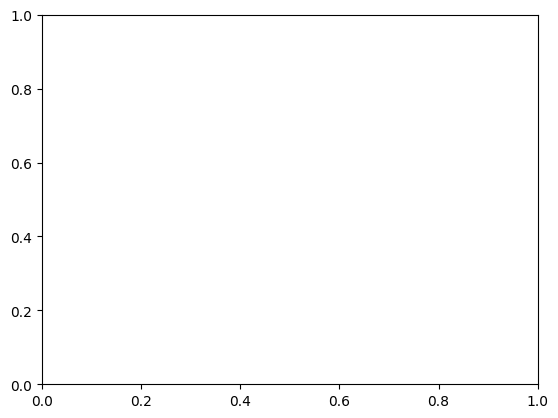

In [10]:
#   Note:   This is only for areal capacity.  Overlays of mass capacity can be done, but both together cannot be done 
#   for multiple samples.   That is, it can be but you will get multiple plot lines.

fig, ax1 = plt.subplots()

g_area = capacity_voltage1.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}  {battery01}')
    
g_area = capacity_voltage2.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}  {battery02}')  #   (Battery 2)')

ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')

# ax1.legend(loc='lower left')
ax1.legend(fontsize=8, loc='center', bbox_to_anchor=(0.335, 1.08))

# optional plot title
#  plt.title(f'{battery01} \nand {battery02}', fontsize=8, loc='right', wrap=True, ha='right')  # Adjust the fontsize as needed

ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis
plt.show()


In [ ]:
# Specify the folder path where you want to save the graph
save_folder1 = file_path01
save_folder2 = file_path02

# Construct the full path to save the file in the specified folder
file_name_x = os.path.join(file_path01, os.path.basename(cell_1 + cell_2 + '_overlay') + ".jpg")
file_name_x2 = os.path.join(file_path02, os.path.basename(cell_1 + cell_2+ '_overlay') + ".jpg")

# Save the figure without including the folder name
fig.savefig(file_name_x, dpi=300)

fig.savefig(file_name_x2, dpi=300)



### Overlay 1,2, 3

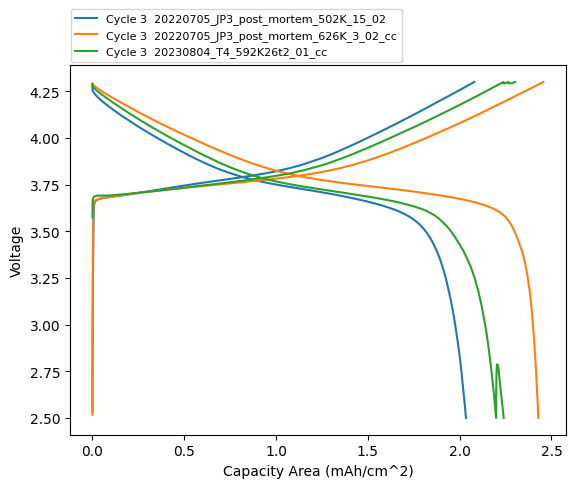

In [96]:
fig, ax1 = plt.subplots()

g_area = capacity_voltage1.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}  {battery01}')
    
g_area = capacity_voltage2.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}  {battery02}')  #   (Battery 2)')
    
g_area = capacity_voltage3.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}  {battery03}')  #   (Battery 3)')

ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')


ax1.legend(fontsize=8, loc='center', bbox_to_anchor=(0.335, 1.08))


ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis
plt.show()


In [11]:
# Specify the folder path where you want to save the graph
save_folder1 = file_path01
save_folder2 = file_path02

# Construct the full path to save the file in the specified folder
file_name_123 = os.path.join(file_path01, os.path.basename(cell_1 + cell_2 + cell_3 + '_overlay') + ".jpg")
file_name_123a = os.path.join(file_path02, os.path.basename(cell_1 + cell_2 + cell_3 + '_overlay') + ".jpg")

# Save the figure without including the folder name
fig.savefig(file_name_123, dpi=300)

fig.savefig(file_name_123a, dpi=300)



NameError: name 'file_path01' is not defined

## battery 04 ##

This code was left for expansion for more cells. it was not used in this template.

In [ ]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

# Define a list of colors for each sample
colors = ['blue', 'red', 'green', 'orange']  # Add more colors if needed

# # Define a list of colors for each cycle
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

g_area = capacity_voltage1.groupby("cycle")
for i, (cycle_number, frame) in enumerate(g_area):
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}', color=colors[i % len(colors)])  # Assign colors in a repeating pattern
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass2.groupby("cycle")
for i, (cycle_number, frame) in enumerate(g_mass):
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)', color=colors[i % len(colors)])  # Assign colors in a repeating pattern
ax2.set_xlabel('Capacity Mass (mAh/g)')


plt.title(battery01+"_"+battery02+"_"+battery03, fontsize=8, loc='right')  # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis

#  ax2.xaxis.label.set_fontsize(10)  # Adjust the font size as needed

# Show the plot
plt.show()

save plot script and export would go here.

Cell 5

In [ ]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

g_area = capacity_voltage5.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}')
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass5.groupby("cycle")
for cycle_number, frame in g_mass:
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)')
ax2.set_xlabel('Capacity Mass (mAh/g)')

plt.title(battery05, fontsize=8, loc='right')  # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis

#  ax2.xaxis.label.set_fontsize(10)  # Adjust the font size as needed

plt.show()

save plot script and export would go here.

Cell 6

In [ ]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

g_area = capacity_voltage6.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}')
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass6.groupby("cycle")
for cycle_number, frame in g_mass:
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)')
ax2.set_xlabel('Capacity Mass (mAh/g)')

plt.title(battery06, fontsize=8, loc='right')  # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis

#  ax2.xaxis.label.set_fontsize(10)  # Adjust the font size as needed

plt.show()

save plot script and export would go here.

Cell 7

In [ ]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

g_area = capacity_voltage7.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}')
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass7.groupby("cycle")
for cycle_number, frame in g_mass:
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)')
ax2.set_xlabel('Capacity Mass (mAh/g)')

plt.title(battery07, fontsize=8, loc='right')  # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis

#  ax2.xaxis.label.set_fontsize(10)  # Adjust the font size as needed

plt.show()

save plot script and export would go here.

Cell 8

In [ ]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

g_area = capacity_voltage8.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}')
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass8.groupby("cycle")
for cycle_number, frame in g_mass:
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)')
ax2.set_xlabel('Capacity Mass (mAh/g)')

plt.title(battery08, fontsize=8, loc='right')  # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis

#  ax2.xaxis.label.set_fontsize(10)  # Adjust the font size as needed

plt.show()

save plot script and export would go here.

Cell 9

In [ ]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

g_area = capacity_voltage9.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}')
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass9.groupby("cycle")
for cycle_number, frame in g_mass:
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)')
ax2.set_xlabel('Capacity Mass (mAh/g)')

plt.title(battery09, fontsize=8, loc='right')  # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis

#  ax2.xaxis.label.set_fontsize(10)  # Adjust the font size as needed

plt.show()

save plot script and export would go here.

Cell 10

In [ ]:
# Script 1: Plotting voltage versus capacity area
fig, ax1 = plt.subplots()

g_area = capacity_voltage10.groupby("cycle")
for cycle_number, frame in g_area:
    ax1.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number}')
ax1.set_xlabel('Capacity Area (mAh/cm^2)')
ax1.set_ylabel('Voltage')
ax1.legend()

# Create a twin x-axis for capacity mass
ax2 = ax1.twiny()

# Script 2: Plotting voltage versus capacity mass on the twin x-axis
g_mass = capacity_mass10.groupby("cycle")
for cycle_number, frame in g_mass:
    ax2.plot(frame.capacity, frame.voltage, label=f'Cycle {cycle_number} (Mass)')
ax2.set_xlabel('Capacity Mass (mAh/g)')

plt.title(battery10, fontsize=8, loc='right')  # Adjust the fontsize as needed

# Adjust the position of the x-axis label for ax2
ax2.xaxis.set_label_coords(0.5, 0.95)  # Adjust the values to move the label below the x2 axis

#  ax2.xaxis.label.set_fontsize(10)  # Adjust the font size as needed

plt.show()

save plot script and export would go here.